# Use Case Name : Optimizing School Infrastructure Planning

# Authored by: Ekanayake Mudiyanselage Ruvinya Yasasmee Ekanayake

## Objective

This project aims to analyze future school-aged population forecasts and existing school infrastructure in the City of Melbourne. The main objective is to identify at-risk suburbs that may require new schools or resource planning by 2030 and beyond.



## Datasets

School Locations Dataset (2024): Includes geographic details of schools in Melbourne.

Population Forecasts Dataset (2020–2040): Provides suburb-level forecasts, including age groups and year-wise projections.

## Preprocessing

Loading both the datasets using pandas. 
To avoid character errors, we load the school location and population forecast files with the necessary encodings. To handle special characters and BOM concerns, the school data is in ISO-8859-1 format, whereas the population data is in utf-8-sig.

In [58]:
import pandas as pd

# Load school locations data
school_df = pd.read_csv(r'C:\Users\ruvin\OneDrive\Desktop\TeamProjectA\dv378_DataVic-SchoolLocations-2024.csv', encoding='ISO-8859-1')

# Load population forecasts data
pop_df = pd.read_csv(r'C:\Users\ruvin\OneDrive\Desktop\TeamProjectA\city-of-melbourne-population-forecasts-by-small-area-2020-2040.csv', encoding='utf-8-sig')


For initial data exploration purposes, we examine the first few rows of each dataset to determine its structure and content. In addition, we evaluate column names, data types, and look for missing values to discover appropriate cleaning procedures.



In [67]:
# View first few rows
print(school_df.head())
print(pop_df.head())

# Check column names and missing values
print(school_df.info())
print(school_df.isnull().sum())

print(pop_df.info())
print(pop_df.isnull().sum())


  Education_Sector  Entity_Type  School_No                    School_Name  \
0         Catholic            2         20                 Parade College   
1         Catholic            2         25       Simonds Catholic College   
2         Catholic            2         26    St Marys College Melbourne   
3         Catholic            2         28  St Patrick's College Ballarat   
4         Catholic            2         29            St Patrick's School   

        Type             Address_Line_1          Suburb Address_State  \
0  Secondary           1436 Plenty Road        BUNDOORA           VIC   
1  Secondary        273 Victoria Street  WEST MELBOURNE           VIC   
2  Secondary         11 Westbury Street   ST KILDA EAST           VIC   
3  Secondary          1431 Sturt Street        BALLARAT           VIC   
4    Primary  119 Drummond Street South        BALLARAT           VIC   

   Address_Postcode Postal_Address_Line_1     Postal_Town Postal_State  \
0              3083     

To ensure data consistency and improve clarity, we performed a cleanup of the school dataset. Specifically, columns such as Address_Line_2 and Postal_Address_Line_2, which contained excessive missing values and were not relevant to our analysis, were dropped conditionally using the errors='ignore' parameter to prevent potential exceptions. Additionally, key columns were renamed for consistency and improved readability across dataframes. Address_Town was renamed to Suburb, Region_Name to Region, and School_Type to Type. These changes facilitated smoother merging and filtering operations in subsequent analysis stages.

In [72]:
# Drop columns only if they exist
school_df = school_df.drop(columns=['Address_Line_2', 'Postal_Address_Line_2'], errors='ignore')

# Rename columns for consistency
school_df.rename(columns={
    'Address_Town': 'Suburb',
    'Region_Name': 'Region',
    'School_Type': 'Type'
}, inplace=True)


To correlate the population information with the project's purpose of examining school infrastructure needs, we filtered the data to include only school-age children, namely those aged 5 to 19. This range was chosen by isolating data from the Age column that fall into the groupings Age 5-9, Age 10-14, and Age 15-19, which represent the primary and secondary school age brackets.

Furthermore, to provide consistency with the school dataset, the Geography column was renamed Suburb. Harmonizing column naming across datasets is critical for optimal data merging and comparison later in the workflow.

In [73]:
# Filter only school-age children (5–19)
school_age_groups = ['Age 5-9', 'Age 10-14', 'Age 15-19']
pop_df = pop_df[pop_df['Age'].isin(school_age_groups)]

# Optional: Clean column names
pop_df.rename(columns={'Geography': 'Suburb'}, inplace=True)


To better comprehend the structure of the population forecast dataset, we utilized the columns.tolist() function to retrieve and show all column names. This stage provides a clear overview of the available data qualities and assists in determining whether critical columns such as Suburb, Year, Age, and Value are present and accurately categorized. This is especially crucial after any renaming or filtering actions since it guarantees that the data is properly formatted for further processing and merging tasks.

In [74]:
print(pop_df.columns.tolist())


['Suburb', 'Year', 'Gender', 'Age', 'Value']


To focus our research, we restricted the population forecast data to only include school-aged children (ages 5–19). This was accomplished by selecting rows whose Age column contained the values Age 5-9, Age 10-14, or Age 15-19. The resulting filtered dataset, school_age_df, depicts the age groups most likely to enroll in primary and secondary schools.

To test the dataset's geographical coverage, we used nunique() to count the number of unique suburbs covered by the population estimates, as well as unique() to list all distinct suburb names. These steps shed light on the spatial distribution of the data, guaranteeing acceptable representation across regions and demonstrating that the dataset is appropriate for suburb-level analysis and fusion with the school location dataset.


In [76]:
# Filter for school-aged children (5 to 19 years)
age_groups = ['Age 5-9', 'Age 10-14', 'Age 15-19']
school_age_df = pop_df[pop_df['Age'].isin(age_groups)]


In [77]:
print(pop_summary['Suburb'].nunique())  # Number of unique suburbs

print(pop_summary['Suburb'].unique())   # List of all suburbs


14
['Carlton' 'City of Melbourne' 'Docklands' 'East Melbourne' 'Kensington'
 'Melbourne (CBD)' 'Melbourne (Remainder)' 'North Melbourne' 'Parkville'
 'Port Melbourne' 'South Yarra' 'Southbank' 'West Melbourne (Industrial)'
 'West Melbourne (Residential)']


The first 20 rows of the pop_summary DataFrame were shown to check data aggregation and formatting, confirming that the population figures were appropriately summarized and ready for comparison analysis.

In [98]:
print(pop_summary.head(20))  # Show first 20 rows


     Suburb  Year  Value
0   Carlton  2023   2456
1   Carlton  2024   2676
2   Carlton  2025   2656
3   Carlton  2026   2743
4   Carlton  2027   2851
5   Carlton  2028   2974
6   Carlton  2029   3081
7   Carlton  2030   3192
8   Carlton  2031   3295
9   Carlton  2032   3404
10  Carlton  2033   3526
11  Carlton  2034   3571
12  Carlton  2035   3609
13  Carlton  2036   3646
14  Carlton  2037   3682
15  Carlton  2038   3723
16  Carlton  2039   3805
17  Carlton  2040   3883
18  Carlton  2041   3954
19  Carlton  2042   4030


To find the places with the largest population of school-aged children, we filtered the pop_summary DataFrame for 2025. We then sorted the data in descending order using the Value column, which indicates the total anticipated population of school-aged children by suburb. Displaying the top ten findings enables us to identify the suburbs that are expected to have the highest demand for educational infrastructure in the near future. This information is crucial for prioritizing places where more school planning and resource allocation may be required.

In [99]:
# Sort by population and see top suburbs in a given year
print(pop_summary[pop_summary['Year'] == 2025].sort_values(by='Value', ascending=False).head(10))


                           Suburb  Year  Value
23              City of Melbourne  2025  15995
107               Melbourne (CBD)  2025   4487
2                         Carlton  2025   2656
149               North Melbourne  2025   1928
170                     Parkville  2025   1662
233                     Southbank  2025   1479
86                     Kensington  2025   1413
44                      Docklands  2025   1123
275  West Melbourne (Residential)  2025    625
212                   South Yarra  2025    317


To better understand the predicted rise of school-aged populations and identify suburbs that would experience increased educational infrastructure demands, we plotted population trends for the top five suburbs with the highest number of school-aged children by 2040. These suburbs were chosen based on their 2040 population prediction, and their annual population data were plotted using matplotlib. The generated line graph depicts how the school-age population is predicted to change over time (2020-2040) in each suburb. This image provides a clear, comparative view of growth trajectories, allowing policymakers and planners to foresee future challenges and carefully plan school expansions or new school developments in the hardest-hit areas.

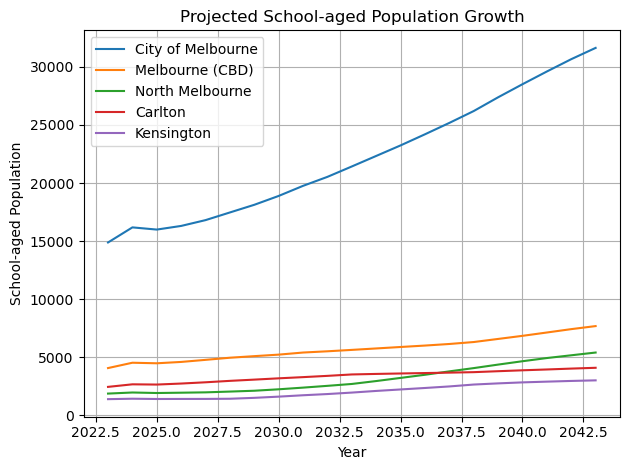

In [80]:
import matplotlib.pyplot as plt

# Example: plot top 5 suburbs with highest population in 2040
top_suburbs = pop_summary[pop_summary['Year'] == 2040].sort_values(by='Value', ascending=False).head(5)['Suburb'].tolist()

for suburb in top_suburbs:
    data = pop_summary[pop_summary['Suburb'] == suburb]
    plt.plot(data['Year'], data['Value'], label=suburb)

plt.xlabel("Year")
plt.ylabel("School-aged Population")
plt.title("Projected School-aged Population Growth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


To investigate the overall growth pattern of the school-aged population across all suburbs, we aggregated population data by year. The filtered school_age_df, which only includes the relevant age groups (5-19), was grouped by the Year column and the Value field was added to calculate the total number of school-aged children for each year from 2020 to 2040.

We then depicted this pattern using a line plot, with the x-axis representing the year and the y-axis representing the total population of school-aged children. This graph depicts the long-term evolution of demand for educational infrastructure. A consistent or dramatic growth in this trend would indicate the necessity for proactive planning in resource allocation, school expansions, and new school construction throughout the region.

In [81]:
school_age_df = pop_df[pop_df['Age'].isin([
    'Age 5-9', 'Age 10-14', 'Age 15-19'
])]


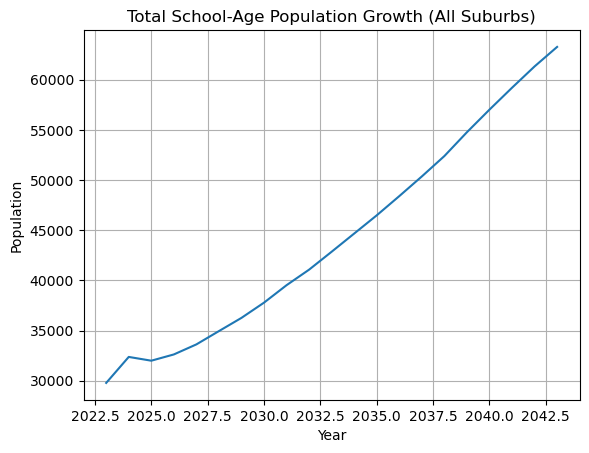

In [82]:
import matplotlib.pyplot as plt

# Example: Total school-age population by year
yearly_trend = school_age_df.groupby('Year')['Value'].sum()

yearly_trend.plot(kind='line', title='Total School-Age Population Growth (All Suburbs)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()


We generated a pivot table from the filtered dataset (school_age_df) to find the suburbs with the greatest increase in school-aged population during a key planning timeframe. The pivot table was designed with suburbs as rows and years as columns, and it summarized the total school-aged population (Value) in each suburb for each year.

We then estimated the absolute rise in school-aged population from 2023 to 2030 by subtracting the 2023 number from the 2030 value for each suburb. This resulted in a new column, Growth_2023_2030, which represents the predicted population growth over the next seven years. By sorting this column in descending order and picking the top ten suburbs, we were able to pinpoint the areas with the fastest-growing demand for school infrastructure.

This information is critical for proactive planning since it identifies which locations may require immediate investment in educational facilities to satisfy future population demands.



In [83]:
pivot = school_age_df.pivot_table(index='Suburb', columns='Year', values='Value', aggfunc='sum')
pivot['Growth_2023_2030'] = pivot[2030] - pivot[2023]
top_growth = pivot['Growth_2023_2030'].sort_values(ascending=False).head(10)
print(top_growth)


Suburb
City of Melbourne               4006
Melbourne (CBD)                 1157
Carlton                          736
Southbank                        473
Parkville                        385
North Melbourne                  369
Docklands                        359
Kensington                       217
West Melbourne (Residential)     136
South Yarra                       96
Name: Growth_2023_2030, dtype: int64


To assess the present distribution of educational infrastructure, we used the value_counts() method on the Suburb column of the school_df dataset. This gave an indication of how many schools are currently located in each suburb.

The top ten suburbs with the most schools provide a fast snapshot of the places with the most educational coverage. This information is critical when comparing current infrastructure to predicted population expansion since it determines if some suburbs are well equipped to handle future demand, or if gaps exist that may necessitate the construction of additional schools.



In [90]:
school_counts = school_df['Suburb'].value_counts()
print(school_counts.head(10))


Suburb
Frankston           12
Werribee            12
KEW                 10
Craigieburn         10
Glen Waverley       10
St Albans           10
Berwick              9
Sunbury              9
Pakenham             8
Hoppers Crossing     8
Name: count, dtype: int64


To analyze the adequacy of educational infrastructure in relation to population demand, we combined school count data with projected population statistics. First, the school_df was changed to ensure compatibility by renaming the Address_Town column to Suburb. We then estimated the number of schools per suburb using a group-by operation and saved the results in school_count_df.

This school count data was combined with the previously produced pop_summary dataset on the Suburb column using a left join, ensuring that all population records were kept, even if a suburb had no related schools. Missing values (NaN) in the School_Count field were replaced with zero in suburbs that did not have schools.

A new statistic, Population_per_School, was devised by dividing the expected population by the number of schools in each suburb. This ratio aids in identifying places with a disproportionately large student population in comparison to current school infrastructure.

To identify priority locations, we filtered and ordered the 2030 data by Population_per_School in descending order. The top ten suburbs on this list are the most likely to be under-resourced in terms of school availability, and therefore should be prioritized for infrastructure investment or legislative intervention.



In [91]:
# Rename for merge compatibility
school_df = school_df.rename(columns={'Address_Town': 'Suburb'})

# Count schools per suburb
school_count_df = school_df.groupby('Suburb').size().reset_index(name='School_Count')

# Merge with population summary
merged_df = pop_summary.merge(school_count_df, on='Suburb', how='left')

# Fill NaNs (for suburbs with 0 schools)
merged_df['School_Count'] = merged_df['School_Count'].fillna(0)


In [92]:
# Create 'Population_per_School' column if it doesn't exist
merged_df['Population_per_School'] = merged_df['Value'] / merged_df['School_Count']

In [93]:
# Correct column name
at_risk = merged_df[merged_df['Year'] == 2030].sort_values(by='Population_per_School', ascending=False).head(10)

print(at_risk[['Suburb', 'Value', 'School_Count', 'Population_per_School']])


                           Suburb  Value  School_Count  Population_per_School
28              City of Melbourne  18891           0.0                    inf
70                 East Melbourne    174           0.0                    inf
112               Melbourne (CBD)   5232           0.0                    inf
133         Melbourne (Remainder)    151           0.0                    inf
280  West Melbourne (Residential)    753           0.0                    inf
154               North Melbourne   2248           1.0                 2248.0
7                         Carlton   3192           2.0                 1596.0
49                      Docklands   1402           1.0                 1402.0
175                     Parkville   1901           2.0                  950.5
238                     Southbank   1806           2.0                  903.0


To graphically communicate the potential burden on school infrastructure, we designed a bar chart depicting the top ten suburbs expected to have the largest population per school in 2030. This measure indicates educational infrastructure pressure.

Before plotting, we removed any suburbs with a School_Count of zero to minimize division errors and focus solely on suburbs having schools. Based on this filtered dataset, we determined the top ten suburbs with the highest Population_per_School values. These suburbs are in locations where existing school facilities may be insufficient to support the expected student population.

The resulting bar chart clearly demonstrates the magnitude of the population burden on each suburb's schools, giving legislators and education planners with useful information. This visual representation facilitates data-driven decision-making in resource allocation, infrastructure expansion, and long-term educational planning.


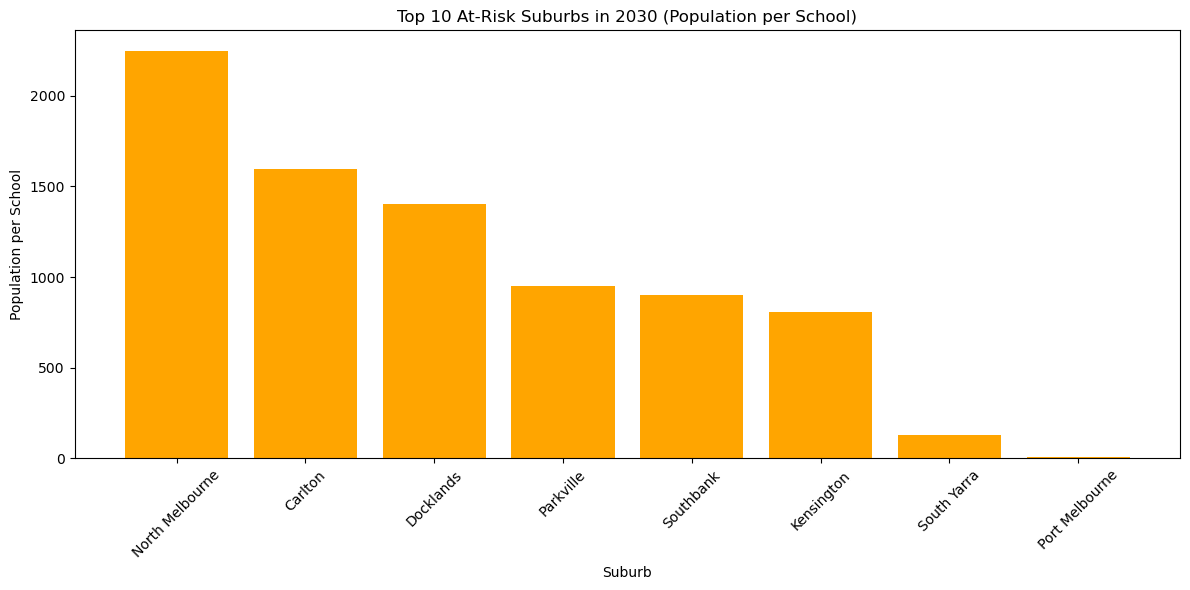

In [94]:
# Filter out suburbs with no schools
valid_risk_2030 = risk_2030[risk_2030['School_Count'] > 0]

# Top 10 suburbs with highest population per school
top10_risk = valid_risk_2030.sort_values(by='Population_per_School', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top10_risk['Suburb'], top10_risk['Population_per_School'], color='orange')
plt.title('Top 10 At-Risk Suburbs in 2030 (Population per School)')
plt.xlabel('Suburb')
plt.ylabel('Population per School')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


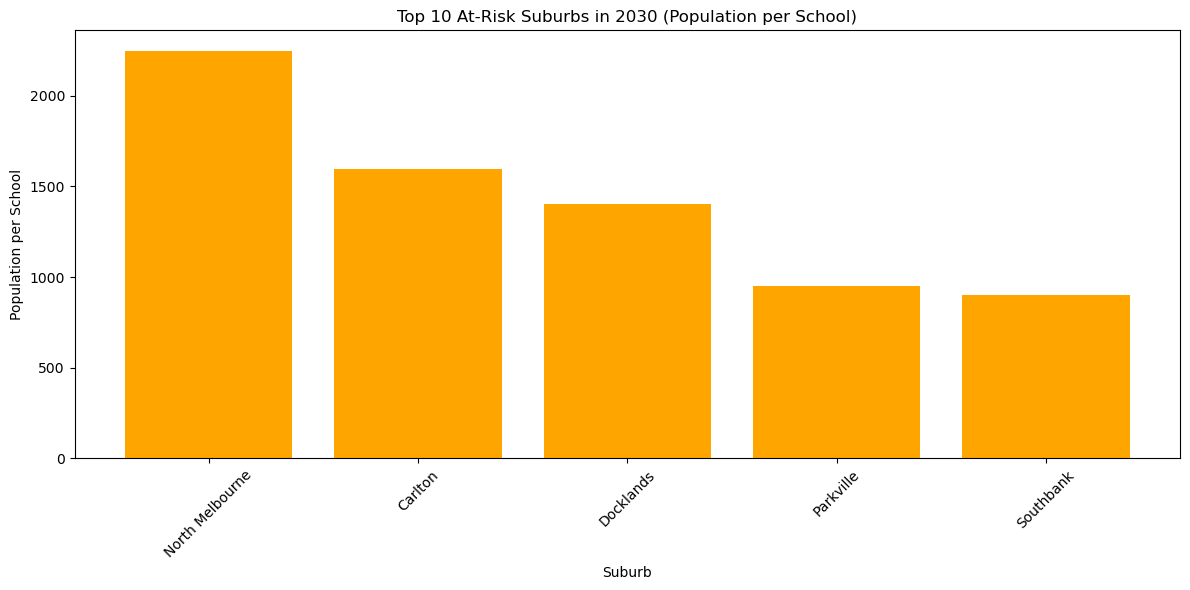

In [95]:
# Filter for 2030
risk_2030 = merged_df[merged_df['Year'] == 2030]

# Top 10 suburbs with highest population per school
top10_risk = risk_2030.sort_values(by='Population_per_School', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(top10_risk['Suburb'], top10_risk['Population_per_School'], color='orange')
plt.title('Top 10 At-Risk Suburbs in 2030 (Population per School)')
plt.xlabel('Suburb')
plt.ylabel('Population per School')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [96]:
!pip install folium


In [97]:
import folium

# Create base map centered on Melbourne
melbourne_map = folium.Map(location=[-37.81, 144.96], zoom_start=10)

# Add school markers
for _, row in school_df.iterrows():
    if pd.notnull(row['Y']) and pd.notnull(row['X']):
        folium.Marker(
            location=[row['Y'], row['X']],
            popup=row['School_Name'],
            icon=folium.Icon(color='blue', icon='graduation-cap', prefix='fa')
        ).add_to(melbourne_map)

# Display map
melbourne_map
